# Collatz Conjucture
**The Collatz conjecture** is a conjecture in mathematics that concerns sequences defined as follows: start with any positive integer n. Then each term is obtained from the previous term as follows: if the previous term is even, the next term is one half of the previous term. If the previous term is odd, the next term is 3 times the previous term plus 1. The conjecture is that no matter what value of n, the sequence will always reach 1.
(Wikipedia)
## Statement of the problem
Consider the following operation on an arbitrary positive integer:

- If the number is even, divide it by two.
- If the number is odd, triple it and add one.

In modular arithmetic notation, define the function f as follows: 

<img style="left;" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ae238aa62598cce67c57371012b818b65d1ad6e3">



The numer of steps it takes a number to reach to 1 is refered to as **Stopping Time** .


In this Notebook we try to explore and visualize some cahracteristic of the Collatz Conjecture.

## Load Packages

In [17]:
#of Course! every python recipe is not complete without Panda nad NumPy
import pandas as pd
import numpy as np
#An advacne apology for all the pythonists/pythonistas. I am not gonna use matplotlib here.
#Plotnine is relativily new package that is meant to mimic the grammer of R's ggplot.
import plotnine
from plotnine import ggplot, aes, geom_line


## Caculate the Conjecture Series

In [23]:
# Create a dictionary of lists: {2: [], 3: [], 4: [],......}
# Each list to hold the number of steps taken to reach 1

arr ={i:[] for i in range(2,100000)}



for i in arr:
    arr[i].append(i)
    res = i
    while (res != 1):
        if (res %2) == 0:
            res = res/2
            arr[i].append(res)
        else:
            res = 3*res+1
            arr[i].append(res)

#Count the  Stopping Time for each Number
cnt = {k:len(v) for k,v in arr.items()}

df = pd.DataFrame.from_dict(cnt,orient="index").reset_index()
df.columns = ['Number','Stopping_Time']

## Visualization

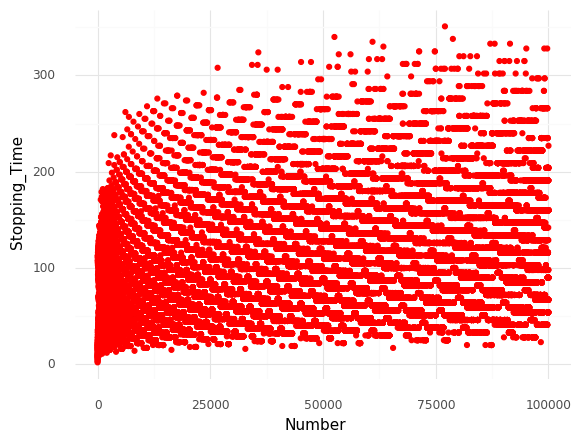

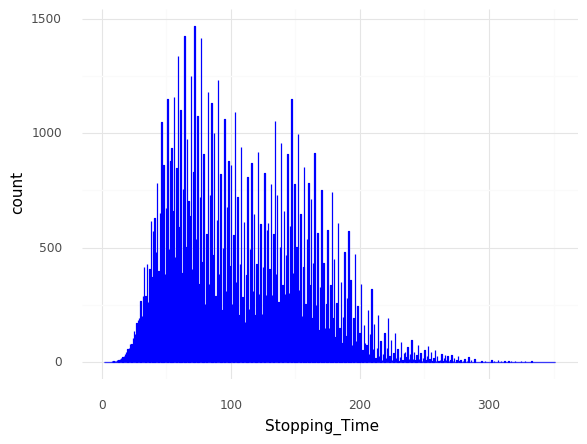

In [25]:

# Scatter Plot of the Starting Number and the Stoppping Time
fig1 = (
    ggplot(df)  # What data to use
    + aes(x="Number", y="Stopping_Time")  # What variable to use
    + plotnine.geom_point(color ='red')  # Geometric object to use for drawing
    +plotnine.theme_minimal()
)

# Histogram of the Stopping Time for 
fig2 = (
    ggplot(df)  # What data to use
    + aes( "Stopping_Time")  # What variable to use
    + plotnine.geom_histogram(color = 'blue', bins=1000)  # Geometric object to use for drawing
    +plotnine.theme_minimal()
)


print(fig1)
print(fig2)

Function to visualized the sequence for n

111


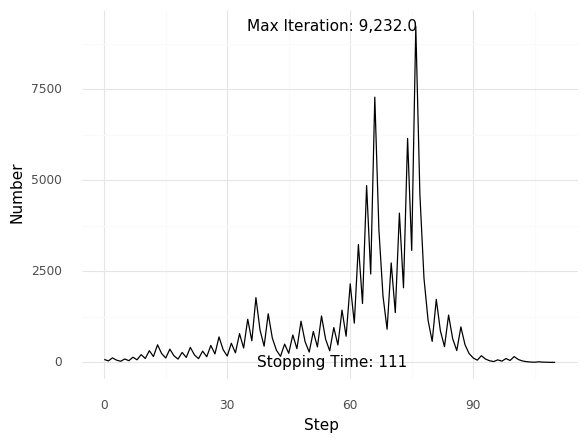

<ggplot: (8756403755641)>

In [7]:
def plot_number(n, logarithmic = False):
    lst = list()
    #print(i)
    res = n
    while (res != 1):
        if (res %2) == 0:
            res = res/2
            lst.append(res)
        else:
            res = 3*res+1
            lst.append(res)

    ss = {k:v for k,v in enumerate(lst)}
    print(len(ss))
    df = pd.DataFrame.from_dict(ss,orient="index").reset_index()
    df.columns = ['Step','Number']
    df
    fig = (
        ggplot(df)  # What data to use
        + aes(x="Step", y="Number")  # What variable to use
        + geom_line()  # Geometric object to use for drawing    
        +plotnine.annotate('text', x=len(ss)/2, y = 1, label = f'Stopping Time: {len(ss)}')
        +plotnine.annotate('text', x=len(ss)/2, y = max(lst), label = f'Max Iteration: {max(lst):,}')
        +plotnine.theme_minimal()
    )
    if logarithmic:
        fig = fig+plotnine.scale_y_log10()

    return fig

plot_number(27)